In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
x=[]
y=[]
categories = ['angry','disgusted','fearful','happy','neutral','sad','surprised']
for i in range(7):
    for dirname, _, filenames in os.walk(f'/kaggle/input/emotion-detection-fer/train/{categories[i]}/'):
        for filename in filenames:
            x.append(plt.imread(os.path.join(dirname, filename)))
            y.append(i)
x = np.array(x)
y = np.array(y)

In [2]:
x = x.reshape(-1, 48, 48, 1)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [5]:
import numpy as np

# Assuming you have already loaded the images into the `x` array
# x = np.array(x)

# Get the shape of the `x` array
image_shape = x[0].shape  # Assuming the images have the same shape, so we get the shape of the first image

print("Input image shape:", image_shape)


Input image shape: (48, 48, 1)


In [6]:
# Get the shape of the `x` array
num_images, height, width = x.shape[:3]  # Extracting the first three dimensions

# If the images are grayscale, there won't be a fourth dimension (channels)
# In that case, set channels to 1
channels = 1 if len(x.shape) == 3 else x.shape[3]

print("Number of images:", num_images)
print("Image height:", height)
print("Image width:", width)
print("Number of channels (e.g., 3 for RGB, 1 for grayscale):", channels)

Number of images: 28709
Image height: 48
Image width: 48
Number of channels (e.g., 3 for RGB, 1 for grayscale): 1


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

# Define your CNN model with L2 regularization
cnn = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(48, 48, 1),kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(7, activation='softmax',kernel_regularizer=l2(0.01))
])

# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
batch_size = 32
epochs = 20
history=cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
673/673 [==============================] - 14s 6ms/step - loss: 1.8335 - accuracy: 0.3140 - val_loss: 1.6767 - val_accuracy: 0.3675
Epoch 2/20
673/673 [==============================] - 4s 5ms/step - loss: 1.6579 - accuracy: 0.3784 - val_loss: 1.6154 - val_accuracy: 0.4122
Epoch 3/20
673/673 [==============================] - 3s 5ms/step - loss: 1.6103 - accuracy: 0.4034 - val_loss: 1.6185 - val_accuracy: 0.4196
Epoch 4/20
673/673 [==============================] - 4s 5ms/step - loss: 1.5838 - accuracy: 0.4184 - val_loss: 1.5686 - val_accuracy: 0.4295
Epoch 5/20
673/673 [==============================] - 3s 5ms/step - loss: 1.5647 - accuracy: 0.4321 - val_loss: 1.5579 - val_accuracy: 0.4373
Epoch 6/20
673/673 [==============================] - 3s 5ms/step - loss: 1.5497 - accuracy: 0.4390 - val_loss: 1.5358 - val_accuracy: 0.4487
Epoch 7/20
673/673 [==============================] - 4s 5ms/step - loss: 1.5399 - accuracy: 0.4473 - val_loss: 1.5795 - val_accuracy: 0.4402
Epoch

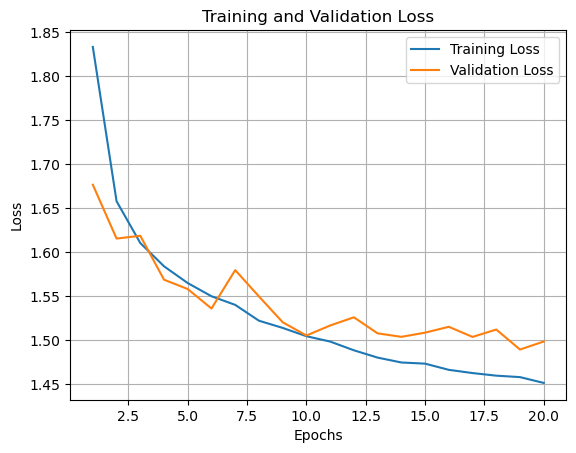

In [9]:


# Extract the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()







In [10]:
cnn.evaluate(x_test,y_test)

225/225 [==============================] - 1s 3ms/step - loss: 1.4982 - accuracy: 0.4815


[1.4981818199157715, 0.48147115111351013]